# Integration of the single degree of freedom dynamics equation

The dynamics equation is:

$$
m\ddot{u} + c\dot{u} + ku = F(t)
$$

where the external force $F(t)$ can be a function or an arbitrary pulse.
It describes the vibration of a structure and can be integrated with the Duhamel method or a direct scheme.

## Definitions

Load key libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Structure properties

In [ ]:
mass = 1
stiffness = 1
damping = 0.05
frequency = np.sqrt(stiffness / mass)

Definition of the pulse

In [ ]:
dt = 0.1
t = np.arange(start=0, stop=20, step=dt)

def Force(t):
    F0 = 1
    Omega = 1
    return F0 * np.sin(Omega*t)
F_t = Force(t)

## Duhamel integral

The Duhamel integral is the result of dividing the integration of the external force $F$ in infinitesimal impulses, and then, superposing the free vibrations due to each infinitesimal impulse.

This yields the following expression:
$$
u(t) = \frac{1}{m\omega_D}\int_0^t F(\tau)e^{-\xi\omega(t-\tau)}\sin\omega_D(t-\tau)d\tau
$$

or a convolution
$$
u(t) = \int_0^t F(\tau)g(t-\tau) d\tau
$$
$$
g(t) = \frac{1}{m\omega_D}e^{-\xi\omega t}\sin\omega_Dt
$$

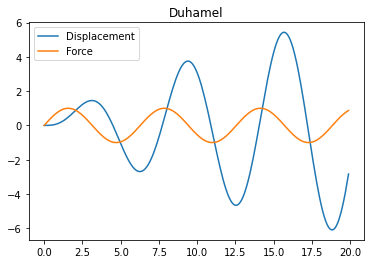

In [ ]:
def FreeVibration(t):
    return 1/mass/frequency * np.exp(-damping*frequency*t) * np.sin(frequency*t)

free_response = FreeVibration(t)
u_duhamel = np.convolve(F_t, free_response, 'full') * dt
u_duhamel = u_duhamel[:len(u_duhamel)//2+1]

plt.title('Duhamel')
plt.plot(t, u_duhamel, label='Displacement')
plt.plot(t, F_t, label='Force')
plt.legend()
plt.show()

## Direct integration

The dynamics equation is typically intergated using the Newmark's scheme. In this case, we will use the methods implemented in Python (Runge-Kutta or BDF) with `solve_ivp`

For convenience, the second order equation is reqritten as
$$
\ddot{u} + 2\xi\omega\dot{u} + \omega^2u = F(t)
$$

The function `solve_ivp` does not solve second order equation directly, but a second order equation can be recast as a pair of first oder equations:
$$
\frac{du}{dt} = \dot{u}
$$
$$
\frac{d\dot{u}}{dt} = F(t) - 2\xi\omega\dot{u} - \omega^2u
$$

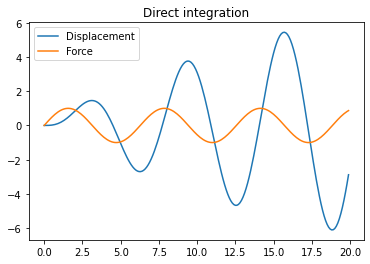

In [ ]:
from scipy.integrate import solve_ivp

def dynamic_system_derivatives(t, y):
    u = y[0]
    v = y[1]
    F = Force(t)
    a = F/mass - 2*damping*frequency*v - frequency**2*u
    return [v, a]

solution = solve_ivp(fun=dynamic_system_derivatives, t_span=[t[0], t[-1]], y0=[0,0], t_eval=t)

plt.title('Direct integration')
plt.plot(solution.t, solution.y[0], label='Displacement')
plt.plot(t, F_t, label='Force')
plt.legend()
plt.show()